In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

file_path = "G:\\Hangkai\\Forest_edge\\country_stats\\edge.xlsx"
df = pd.read_excel(file_path)

In [2]:
print(df.describe())

       Edge of Unchanged Forests  Pure Unchanged Forest Edge  \
count               2.580000e+02                2.580000e+02   
mean                8.306561e+05                1.154868e+08   
std                 3.052038e+06                4.305893e+08   
min                 0.000000e+00                0.000000e+00   
25%                 3.954775e+02                3.503236e+04   
50%                 5.504840e+04                5.712950e+06   
75%                 4.915115e+05                6.090329e+07   
max                 3.256448e+07                4.577861e+09   

       Pure Increased Forest Edge  Pure Decreased Forest Edge  \
count                2.580000e+02                2.580000e+02   
mean                 2.585551e+05                3.518215e+05   
std                  1.033708e+06                1.454858e+06   
min                  0.000000e+00                0.000000e+00   
25%                  5.269140e+01                5.114728e+01   
50%                  1.082021e+04

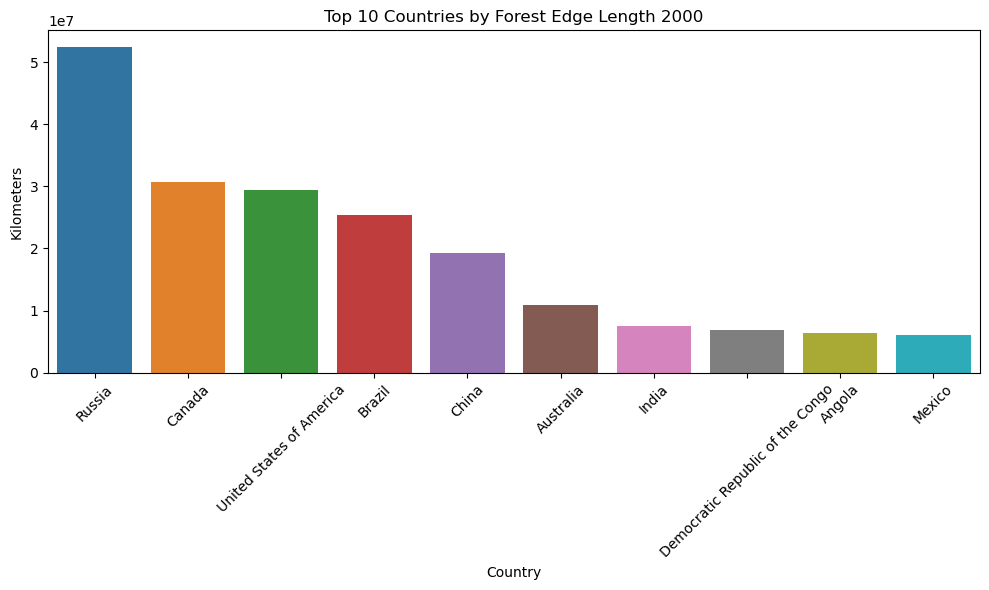

In [27]:
plt.figure(figsize=(10,6))
Edge_country_2000 = df.sort_values('Total Forest Edge 2000', ascending=False).head(10)

sns.barplot(data=Edge_country_2000, x='Country', y='Total Forest Edge 2000')
plt.title('Top 10 Countries by Forest Edge Length 2000')
plt.ylabel('Kilometers')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

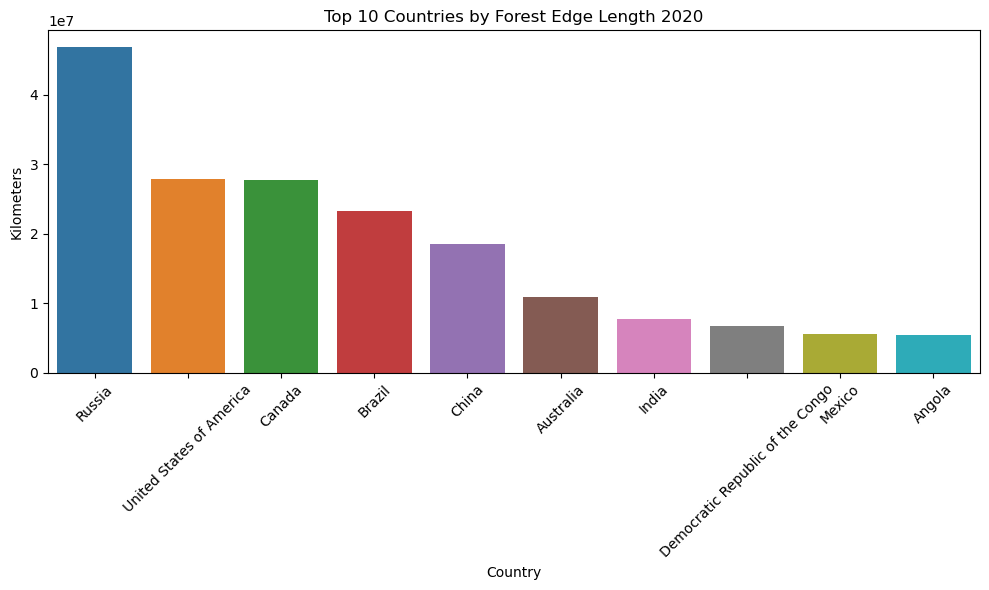

In [28]:
plt.figure(figsize=(10,6))
Edge_country_2020 = df.sort_values('Total Forest Edge 2020', ascending=False).head(10)

sns.barplot(data=Edge_country_2020, x='Country', y='Total Forest Edge 2020')
plt.title('Top 10 Countries by Forest Edge Length 2020')
plt.ylabel('Kilometers')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

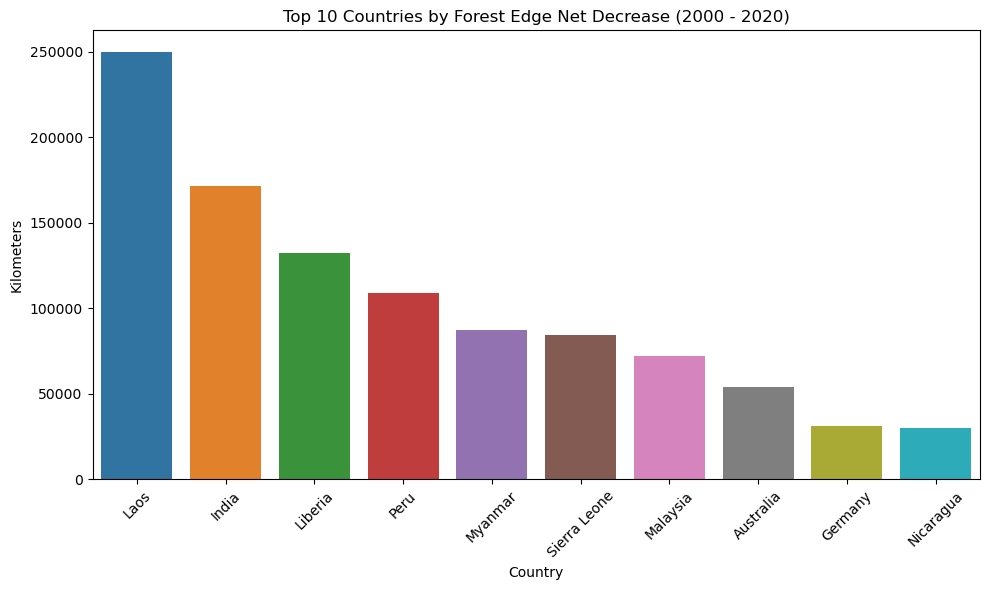

In [3]:
df['Forest Edge Change'] = df['Total Forest Edge 2020'] - df['Total Forest Edge 2000']
top_countries_change = df.sort_values('Forest Edge Change', ascending=False).head(10)

plt.figure(figsize=(10,6))
sns.barplot(data=top_countries_change, x='Country', y='Forest Edge Change')
plt.title('Top 10 Countries by Forest Edge Net Decrease (2000 - 2020)')
plt.ylabel('Kilometers')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

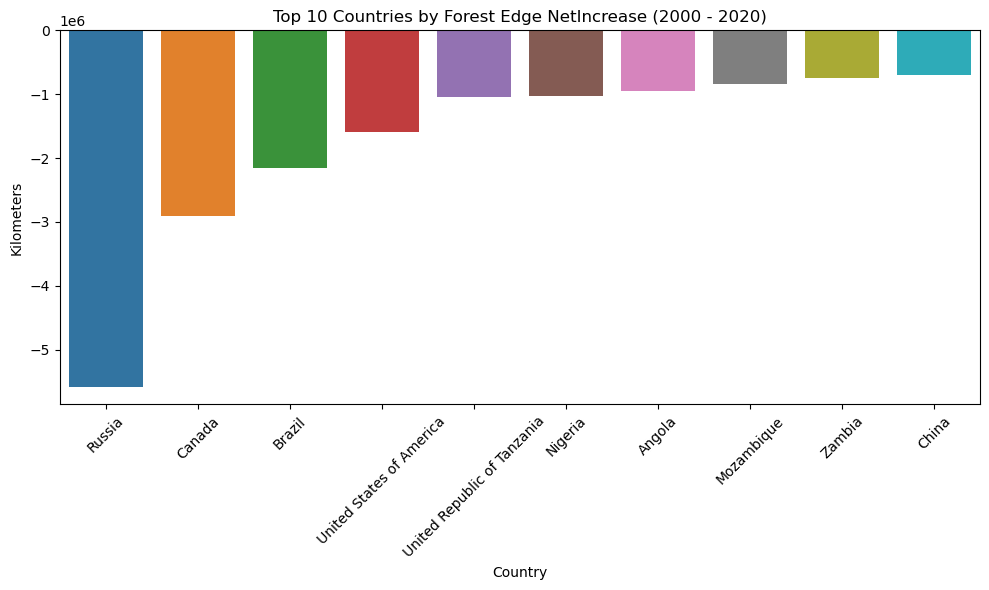

In [4]:
df['Forest Edge Change'] = df['Total Forest Edge 2020'] - df['Total Forest Edge 2000']
top_countries_change = df.sort_values('Forest Edge Change', ascending=True).head(10)

plt.figure(figsize=(10,6))
sns.barplot(data=top_countries_change, x='Country', y='Forest Edge Change')
plt.title('Top 10 Countries by Forest Edge NetIncrease (2000 - 2020)')
plt.ylabel('Kilometers')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

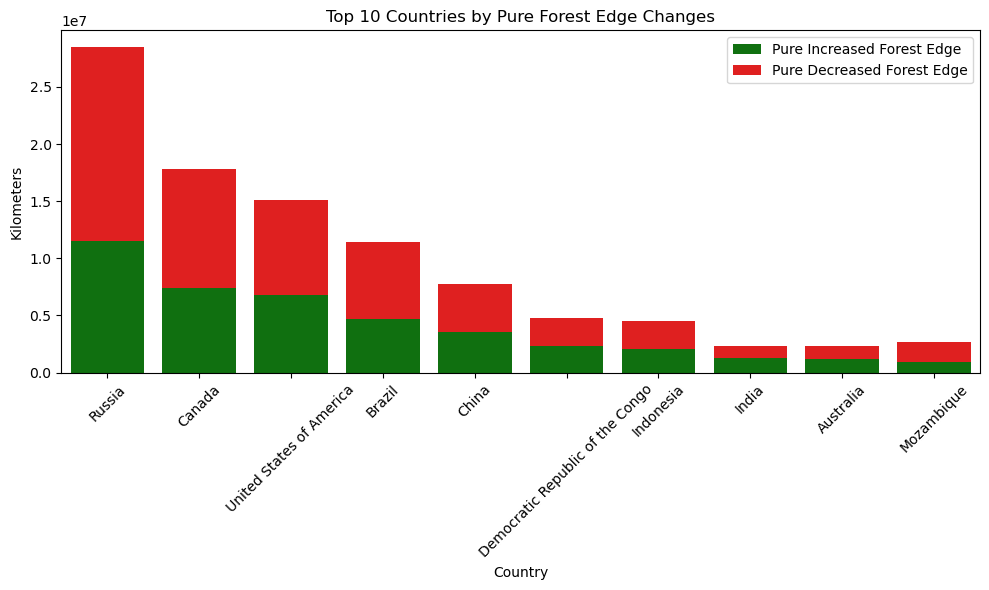

In [5]:
top_countries_pure = df.nlargest(10, ['Pure Increased Forest Edge', 'Pure Decreased Forest Edge'])

plt.figure(figsize=(10,6))
sns.barplot(data=top_countries_pure, x='Country', y='Pure Increased Forest Edge', color='green', label='Pure Increased Forest Edge')
sns.barplot(data=top_countries_pure, x='Country', y='Pure Decreased Forest Edge', color='red', label='Pure Decreased Forest Edge', bottom=top_countries_pure['Pure Increased Forest Edge'])
plt.title('Top 10 Countries by Pure Forest Edge Changes')
plt.ylabel('Kilometers')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

                            Pure Increased Forest Edge  \
Pure Increased Forest Edge                    1.000000   
Pure Decreased Forest Edge                    0.992565   

                            Pure Decreased Forest Edge  
Pure Increased Forest Edge                    0.992565  
Pure Decreased Forest Edge                    1.000000  


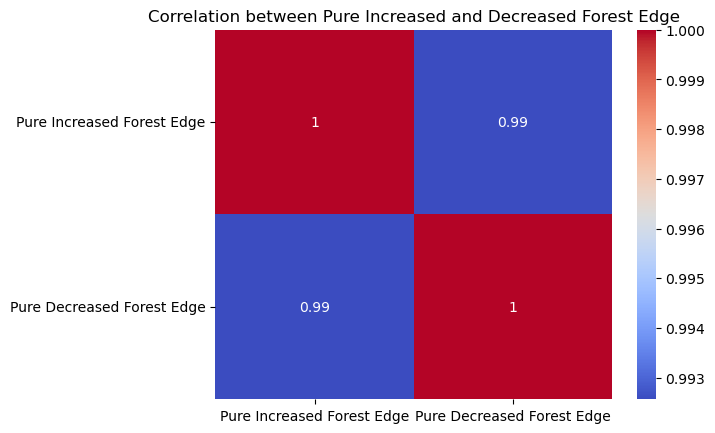

In [6]:
correlation = df[['Pure Increased Forest Edge', 'Pure Decreased Forest Edge']].corr()
print(correlation)
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title('Correlation between Pure Increased and Decreased Forest Edge')
plt.show()

In [7]:
max_pure_increased = df[df['Pure Increased Forest Edge'] == df['Pure Increased Forest Edge'].max()]['Country'].values[0]
min_pure_decreased = df[df['Pure Decreased Forest Edge'] == df['Pure Decreased Forest Edge'].min()]['Country'].values[0]

print(f"Country with maximum pure increased forest edge: {max_pure_increased}")
print(f"Country with minimum pure decreased forest edge: {min_pure_decreased}")

Country with maximum pure increased forest edge: Russia
Country with minimum pure decreased forest edge: Western Sahara


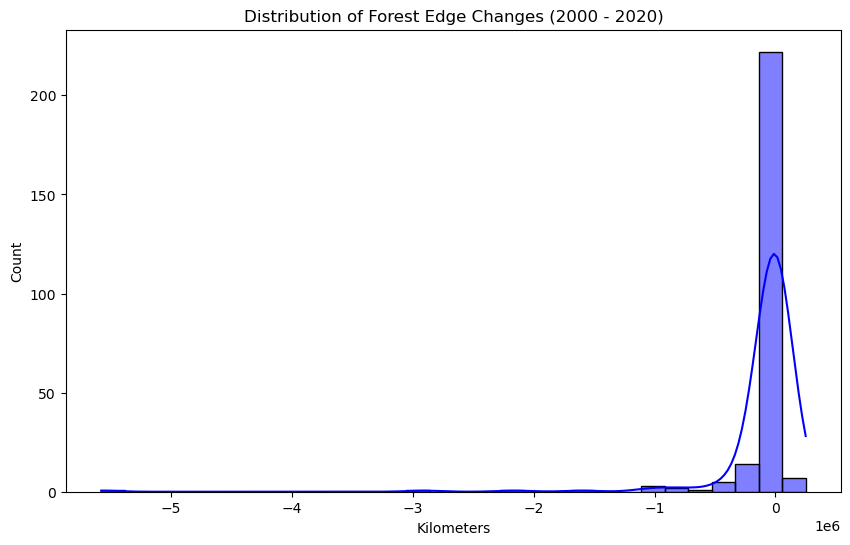

In [8]:
plt.figure(figsize=(10,6))
sns.histplot(df['Forest Edge Change'], bins=30, color='blue', kde=True)
plt.title('Distribution of Forest Edge Changes (2000 - 2020)')
plt.xlabel('Kilometers')
plt.show()

In [9]:
df['Percentage Edge Change'] = ((df['Total Forest Edge 2020'] - df['Total Forest Edge 2000']) / df['Total Forest Edge 2000']) * 100

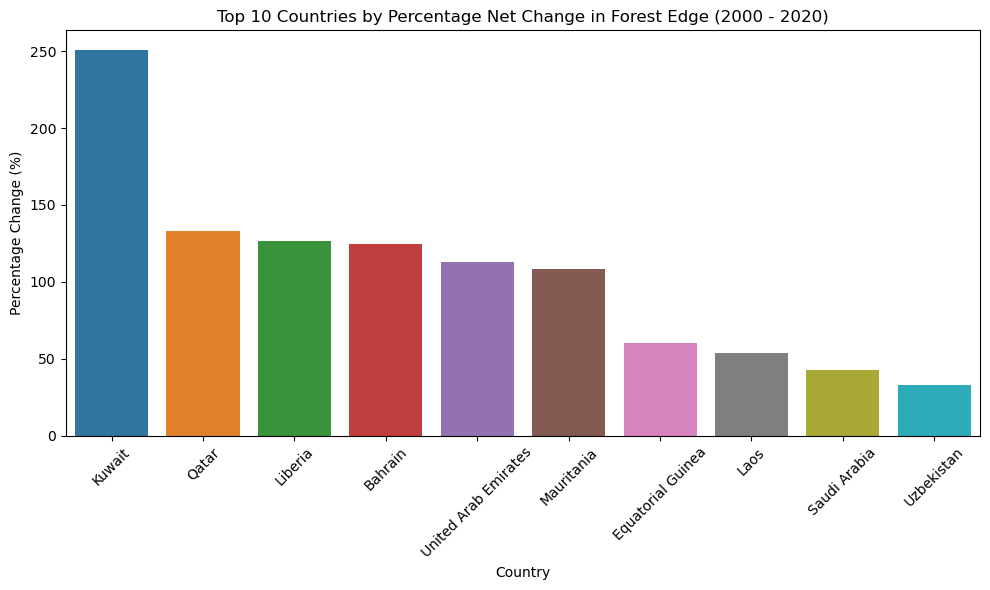

In [10]:
top_percentage_change = df.sort_values('Percentage Edge Change', ascending=False).head(10)

plt.figure(figsize=(10,6))
sns.barplot(data=top_percentage_change, x='Country', y='Percentage Edge Change')
plt.title('Top 10 Countries by Percentage Net Change in Forest Edge (2000 - 2020)')
plt.ylabel('Percentage Change (%)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

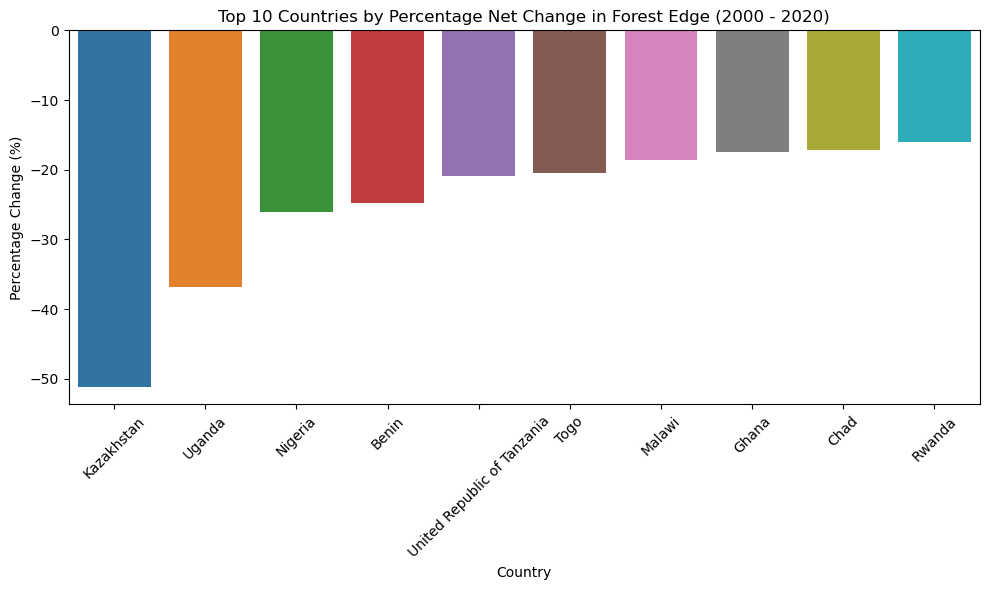

In [11]:
top_percentage_change = df.sort_values('Percentage Edge Change', ascending=True).head(10)

plt.figure(figsize=(10,6))
sns.barplot(data=top_percentage_change, x='Country', y='Percentage Edge Change')
plt.title('Top 10 Countries by Percentage Net Change in Forest Edge (2000 - 2020)')
plt.ylabel('Percentage Change (%)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

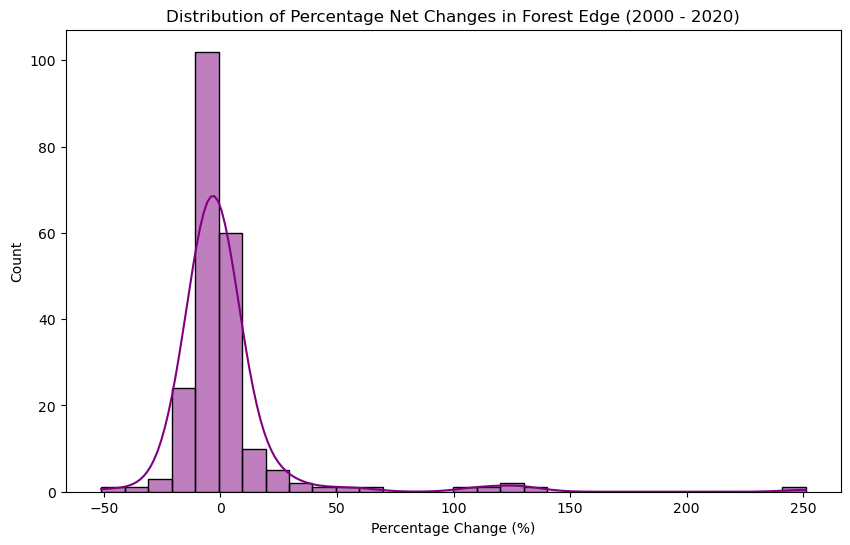

In [18]:
plt.figure(figsize=(10,6))
sns.histplot(df['Percentage Edge Change'], bins=30, color='purple', kde=True)
plt.title('Distribution of Percentage Net Changes in Forest Edge (2000 - 2020)')
plt.xlabel('Percentage Change (%)')
plt.show()

In [13]:
max_percentage_change_country = df[df['Percentage Edge Change'] == df['Percentage Edge Change'].max()]['Country'].values[0]
min_percentage_change_country = df[df['Percentage Edge Change'] == df['Percentage Edge Change'].min()]['Country'].values[0]

print(f"Country with maximum percentage Net change in forest edge: {max_percentage_change_country}")
print(f"Country with minimum percentage Net change in forest edge: {min_percentage_change_country}")

Country with maximum percentage Net change in forest edge: Kuwait
Country with minimum percentage Net change in forest edge: Kazakhstan


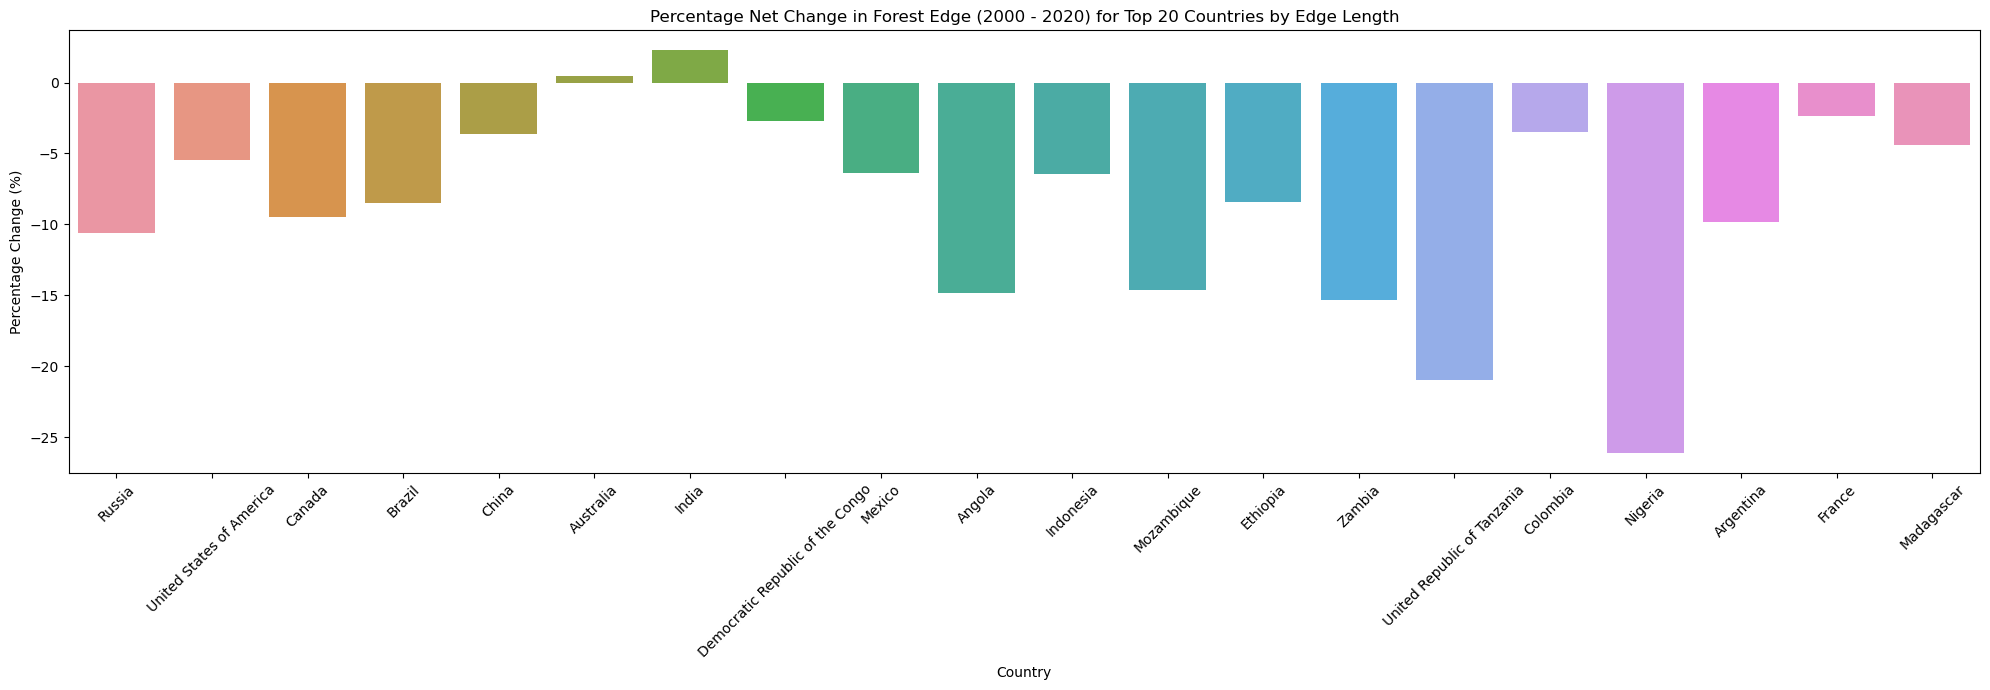

In [14]:
top_20_countries_by_edge = df.nlargest(20, 'Total Forest Edge 2020')
plt.figure(figsize=(20,7))
sns.barplot(data=top_20_countries_by_edge, x='Country', y='Percentage Edge Change')
plt.title('Percentage Net Change in Forest Edge (2000 - 2020) for Top 20 Countries by Edge Length')
plt.ylabel('Percentage Change (%)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [15]:
df['Absolute Forest Disturbance'] = df['Pure Increased Forest Edge'] + df['Pure Decreased Forest Edge']
top_20_countries_by_disturbance = df.nlargest(20, 'Absolute Forest Disturbance')

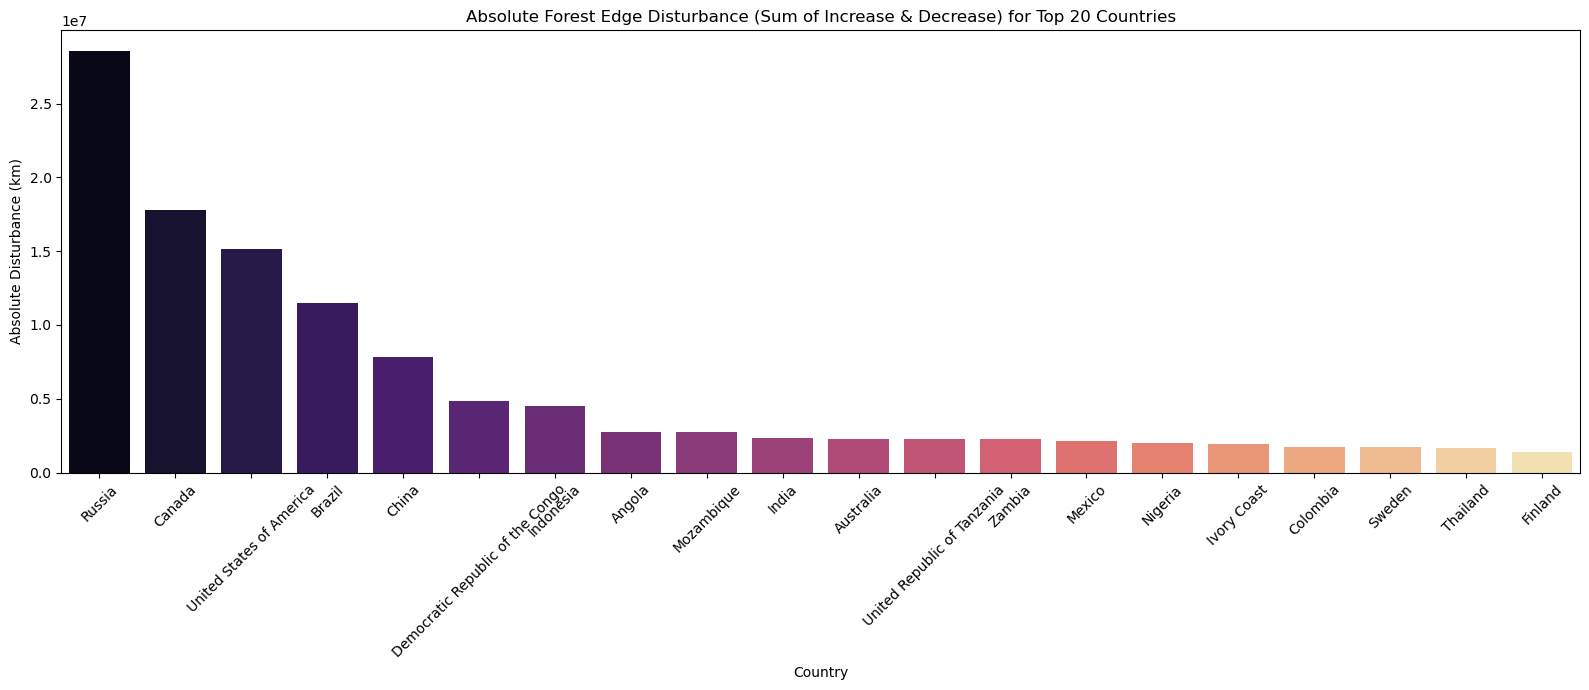

In [16]:
plt.figure(figsize=(16,7))
sns.barplot(data=top_20_countries_by_disturbance, x='Country', y='Absolute Forest Disturbance', palette='magma')
plt.title('Absolute Forest Edge Disturbance (Sum of Increase & Decrease) for Top 20 Countries')
plt.ylabel('Absolute Disturbance (km)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

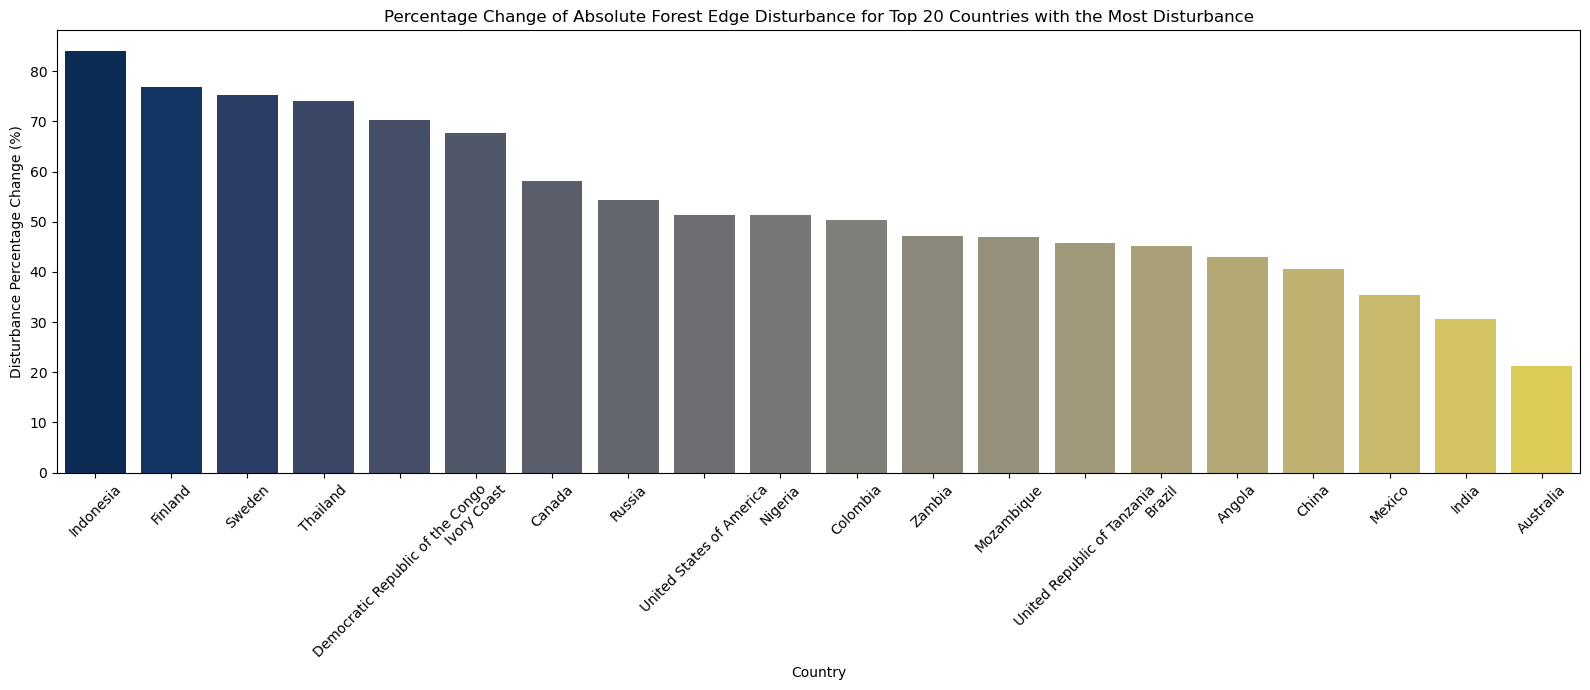

In [17]:
# Computing Disturbance Percentage Change for entire dataframe
df['Disturbance Percentage Change'] = (df['Absolute Forest Disturbance'] / df['Total Forest Edge 2000']) * 100

# Re-selecting the top 20 countries by absolute forest disturbance
top_20_countries_by_disturbance = df.nlargest(20, 'Absolute Forest Disturbance')

# Sorting these 20 countries by Disturbance Percentage Change
top_20_countries_by_disturbance_percentage_change = top_20_countries_by_disturbance.sort_values('Disturbance Percentage Change', ascending=False)

# Visualization
plt.figure(figsize=(16,7))
sns.barplot(data=top_20_countries_by_disturbance_percentage_change, x='Country', y='Disturbance Percentage Change', palette='cividis')
plt.title('Percentage Change of Absolute Forest Edge Disturbance for Top 20 Countries with the Most Disturbance')
plt.ylabel('Disturbance Percentage Change (%)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()